#Reading Data and Importing Libaries

In [ ]:

# Paths to data sets
#Change these Path to the paths where the data is located
PATH_to_train = ""
PATH_to_test = ""
PATH_to_original = ""
#Run this if the data is stored on google drive, to connect to it
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#imports
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

In [ ]:
#Reading Data
data_pd = pd.read_csv(PATH_to_train)
test_pd = pd.read_csv(PATH_to_test)
original_pd = pd.read_csv(PATH_to_original)
data_pd_id = data_pd.id
data_pd = data_pd.drop(['id'], axis=1)
test_pd_id = test_pd.id

In [ ]:
data_pd.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
#Concat Datasets
data_pd = pd.concat([data_pd, original_pd], ignore_index=True)
#print(np.shape(data_pd))
#Check structure of dataset
data_pd.dtypes

(20758, 17)
(2111, 17)
(22869, 17)


Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [ ]:
#Check if there are NaN values
#nan_rows = data_pd[data_pd.isnull().any(axis=1)]
nan_rows = original_pd[original_pd.isnull().any(axis=1)]
nan_rows = test_pd[test_pd.isnull().any(axis=1)]
# Print rows with NaN values
print(nan_rows)


Empty DataFrame
Columns: [id, Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS]
Index: []


In [ ]:
#Print the amount of unique variable in each columns
unique_count = data_pd.nunique()
print(unique_count)
unique_count = data_pd['NObeyesdad'].unique()
print(unique_count)

Gender                               2
Age                               1739
Height                            1862
Weight                            2014
family_history_with_overweight       2
FAVC                                 2
FCVC                               975
NCP                                740
CAEC                                 4
SMOKE                                2
CH2O                              1568
SCC                                  2
FAF                               1408
TUE                               1329
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64
['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


#Exploratory Data Analysis

In [ ]:
#For convenience reload data
synth_data_pd = pd.read_csv(PATH_to_train)
synth_data_pd = synth_data_pd.drop(['id'], axis=1)

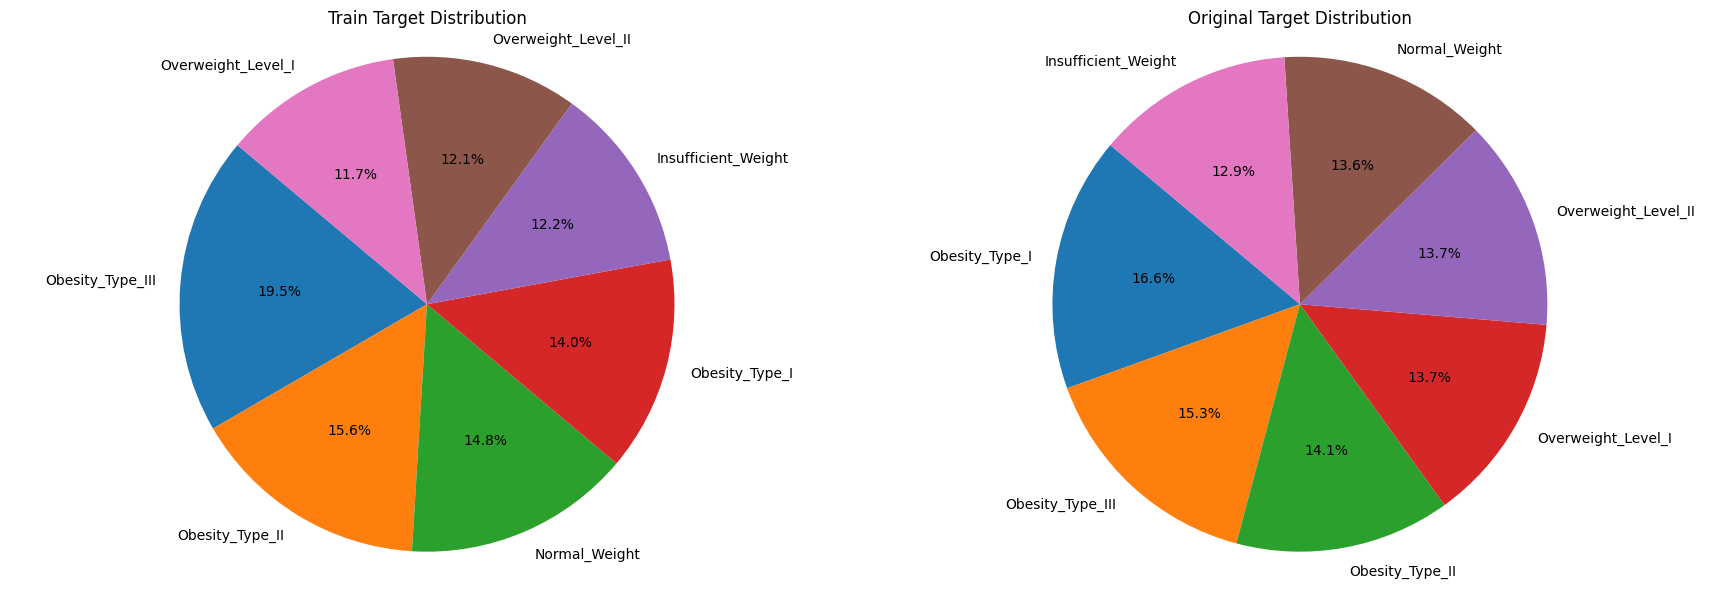

In [ ]:
def plot_pie_chart(data, title, ax):
    data_counts = data['NObeyesdad'].value_counts()
    labels = data_counts.index
    sizes = data_counts.values


    ax.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Create three subplots in a row

plot_pie_chart(synth_data_pd, "Train Target Distribution", axes[0])
plot_pie_chart(original_pd, "Original Target Distribution", axes[1])

plt.tight_layout()
plt.show()

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


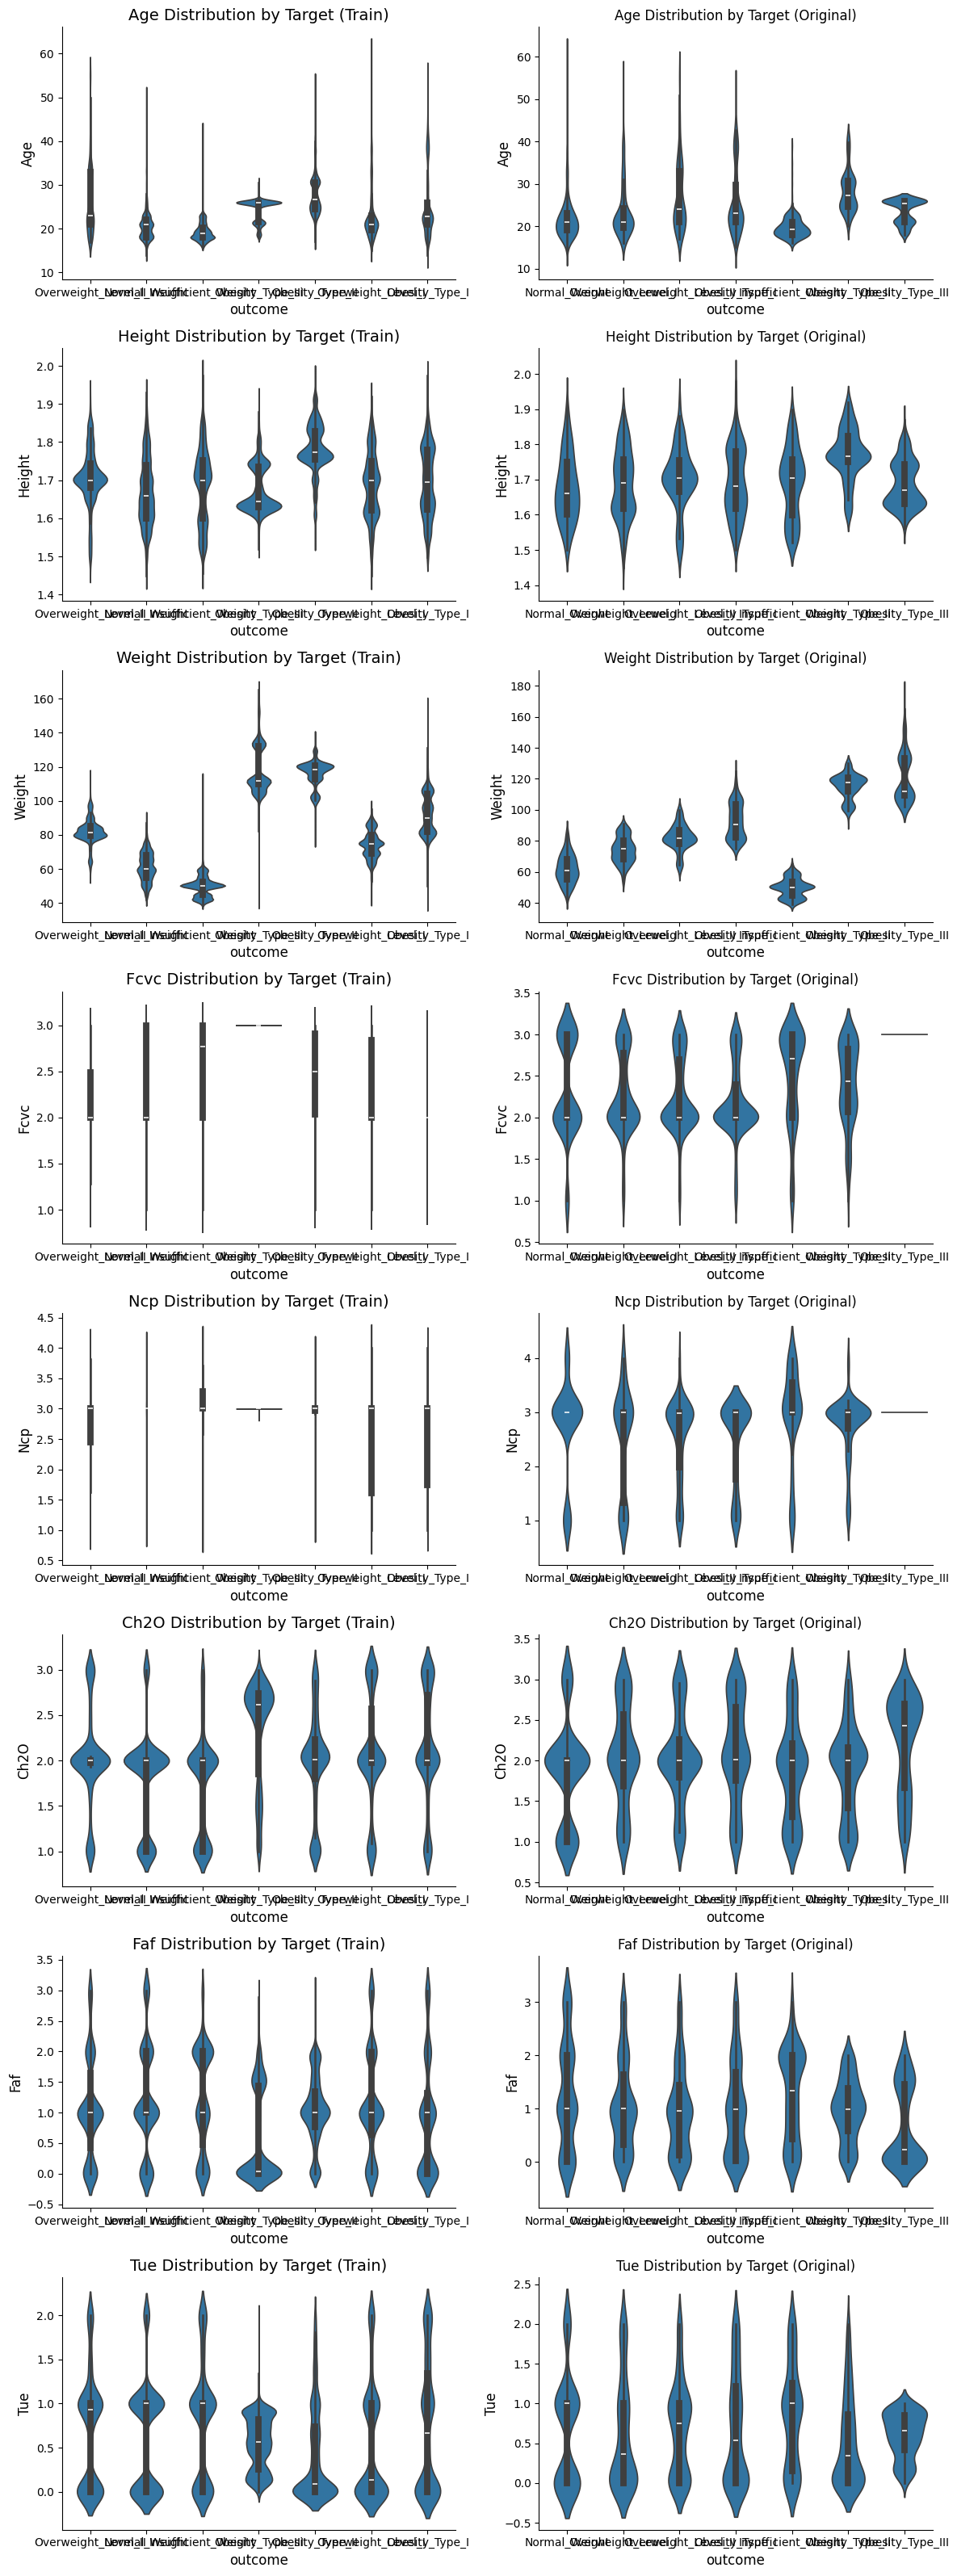

In [ ]:
"""
data_copy=data_pd.copy()
original_copy=original_pd.copy()
data_copy = data_copy.drop(['id'], axis=1)
original_copy = original_copy.drop(['ID'], axis=1)
"""
cont_cols = [f for f in synth_data_pd.columns if synth_data_pd[f].dtype != 'O' and synth_data_pd[f].nunique() > 2]
n_rows = len(cont_cols)
fig, axs = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))
#sns.set_palette([(0.8, 0.56, 0.65), 'crimson',  (0.99, 0.8, 0.3)])

for i, col in enumerate(cont_cols):
    sns.violinplot(x='NObeyesdad', y=col, data=synth_data_pd, ax=axs[i, 0])
    axs[i, 0].set_title(f'{col.title()} Distribution by Target (Train)', fontsize=14)
    axs[i, 0].set_xlabel('outcome', fontsize=12)
    axs[i, 0].set_ylabel(col.title(), fontsize=12)
    sns.despine()

    sns.violinplot(x='NObeyesdad', y=col, data=original_pd, ax=axs[i, 1])
    axs[i, 1].set_title(f'{col.title()} Distribution by Target (Original)', fontsize=12)
    axs[i, 1].set_xlabel('outcome', fontsize=12)
    axs[i, 1].set_ylabel(col.title(), fontsize=12)
    sns.despine()

fig.tight_layout()

plt.show()

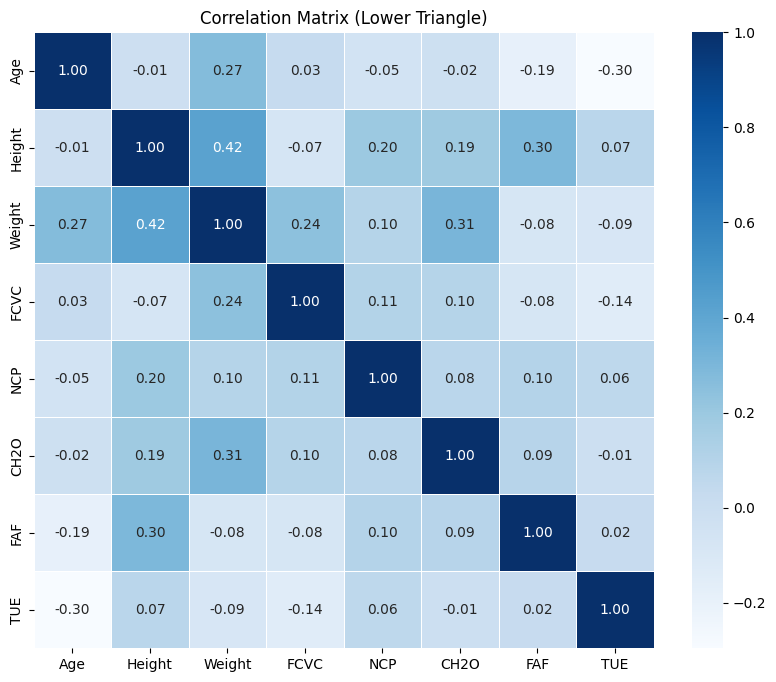

In [ ]:
cont_cols = [f for f in synth_data_pd.columns if synth_data_pd[f].dtype != 'O']

# Removing the correlated columns (Mostly are the Engineered ones), very necessary to reduce overfitting
correlation_matrix = data_pd[cont_cols].corr()

# Create a heatmap with masked upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()
#Here there are none

#Data Preprocessing

In [ ]:
#Get Categorical columns with only 2 unique values
object_cols=['Gender', 'family_history_with_overweight', 'SMOKE', 'SCC', 'FAVC']

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
data_pd[object_cols] = ordinal_encoder.fit_transform(data_pd[object_cols])
test_pd[object_cols] = ordinal_encoder.transform(test_pd[object_cols])

data_pd.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.0,24.443011,1.699998,81.66995,1.0,1.0,2.0,2.983297,Sometimes,0.0,2.763573,0.0,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,0.0,18.000000,1.560000,57.00000,1.0,1.0,2.0,3.000000,Frequently,0.0,2.000000,0.0,1.0,1.000000,no,Automobile,Normal_Weight


In [ ]:
#Apply OneHot Encoding
object_cols = ['CAEC', 'CALC', 'MTRANS']
data_pd = pd.get_dummies(data_pd, columns=object_cols)
test_pd = pd.get_dummies(test_pd, columns=object_cols)
data_pd.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1.0,24.443011,1.699998,81.66995,1.0,1.0,2.0,2.983297,0.0,2.763573,...,0,0,0,1,0,0,0,0,1,0
1,0.0,18.000000,1.560000,57.00000,1.0,1.0,2.0,3.000000,0.0,2.000000,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
def createBMI(row):
  """
  calculates BMI
  """
  BMI = row['Weight']/(row['Height']*row['Height'])
  return BMI

def givelabel(row):
  """
  Testfunction to just use BMI
  """
  if row['Age'] < 65:
    if row['BMI'] < 18.5:
      return 'Insufficient_Weight'
    if row['BMI'] < 25 and row['BMI']>=18.5:
      return 'Normal_Weight'
    if row['BMI'] < 27.5 and row['BMI']>=25:
      return 'Overweight_Level_I'
    if row['BMI'] < 30 and row['BMI']>=27.5:
      return 'Overweight_Level_II'
    if row['BMI'] < 35 and row['BMI']>=30:
      return 'Obesity_Type_I'
    if row['BMI'] < 40 and row['BMI']>=35:
      return 'Obesity_Type_II'
    if row['BMI']>=40:
      return 'Obesity_Type_III'
  else:
    if row['BMI'] < 22:
      return 'Insufficient_Weight'
    if row['BMI'] < 27 and row['BMI']>=22:
      return 'Normal_Weight'
    if row['BMI'] < 28.5 and row['BMI']>=27:
      return 'Overweight_Level_I'
    if row['BMI'] < 30 and row['BMI']>=28.5:
      return 'Overweight_Level_II'
    if row['BMI'] < 35 and row['BMI']>=30:
      return 'Obesity_Type_I'
    if row['BMI'] < 40 and row['BMI']>=35:
      return 'Obesity_Type_II'
    if row['BMI']>=40:
      return 'Obesity_Type_III'

In [ ]:
#AddBMI
test_pd['BMI'] = test_pd.apply(createBMI, axis=1)
data_pd['BMI'] = data_pd.apply(createBMI, axis=1)

In [ ]:
#Normalize columns
scaler = StandardScaler()
float_cols = ['BMI', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF','TUE']
#float_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF','TUE']
data_pd[float_cols] = scaler.fit_transform(data_pd[float_cols])
test_pd[float_cols] = scaler.transform(test_pd[float_cols])



In [ ]:
#Create Train_validation split
deleting_rows = ['MTRANS']
#data_pd =data_pd.drop(deleting_rows, axis=1)
#test_pd =test_pd.drop(deleting_rows, axis=1)
y = data_pd['NObeyesdad']
le = LabelEncoder()
y = le.fit_transform(y)
X = data_pd.drop(['NObeyesdad'], axis=1)
X_test = test_pd.drop(['id'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, test_size=0.1,
                                                                random_state=0)

#Different models

In [ ]:
#Random Forset
regr = RandomForestClassifier(n_estimators=500, random_state=0)
regr.fit(X_train, y_train)
valid_predictions_rf = regr.predict_proba(X_val)
X_val_labels_rf = np.argmax(valid_predictions_rf, axis=1)
print(accuracy_score(y_val, X_val_labels_rf))

regr.fit(X, y)
test_predictions_rf = regr.predict_proba(X_test)


0.90030607783122


In [ ]:
#GradiendBoosting Classifier
regr = GradientBoostingClassifier(max_depth=3,n_estimators=140, random_state=0)
regr.fit(X_train, y_train)
valid_predictions_grdb = regr.predict_proba(X_val)
X_val_labels_grdb = np.argmax(valid_predictions_grdb, axis=1)
print(accuracy_score(y_val, X_val_labels_grdb))

regr.fit(X, y)
test_predictions_grdb = regr.predict_proba(X_test)

0.9029296020988195


In [ ]:
#LGBM Boosting classifier
#0.9151
param = {"objective": "multiclass",
    "metric": "multi_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "random_state": 42,
    "num_class": 7,
    'learning_rate': 0.030962211546832760,
    'n_estimators': 510,
    'lambda_l1': 0.009667446568254372,
    'lambda_l2': 0.04018641437301800,
    'max_depth': 12,
    'colsample_bytree': 0.40977129346872643,
    'subsample': 0.9535797422450176,
    'min_child_samples': 26}

model_lgb = LGBMClassifier(**param,verbose=100)
model_lgb.fit(X_train, y_train)
valid_predictions_lgb = model_lgb.predict_proba(X_val)
X_val_labels = np.argmax(valid_predictions_lgb, axis=1)
print(accuracy_score(y_val, X_val_labels))

#Run on whole dataset and create submission data
model_lgb.fit(X, y)
test_predictions_lgb = model_lgb.predict_proba(X_test)
#predictions = np.argmax(test_predictions, axis=1)
ids = test_pd_id

0.915172715347617


In [ ]:
#90.42 with BMI without Mtrans
#90.60 with BMI and Mtrans, #0.9116746829908177
#89.02 withouth BMI and Mtrans
#89.02 withouth BMI and with Mtrans
#XGB_Boosting Classifier
xgb_params = {'max_depth': 5,
 'min_child_weight': 8,
 'learning_rate': 0.10450346600896168,
 'n_estimators': 400,
 'subsample': 0.5855025206558809,
 'colsample_bytree': 0.14926372575849994,
 'reg_alpha': 0.7621405624015435,
 'reg_lambda': 0.6443164876665903,
  'tree_method': 'hist',
  'eval_metric': 'mlogloss',
  'verbosity': 2,
 'random_state': 42}
xgb_model = XGBClassifier(**xgb_params )
xgb_model.fit(X_train, y_train )

    # predictions on the validation set
valid_predictions_xgb = xgb_model.predict_proba(X_val)

X_val_labels = np.argmax(valid_predictions_xgb, axis=1)
print(accuracy_score(y_val, X_val_labels))

#Run on whole dataset and create submission data
xgb_model.fit(X, y)
test_predictions_xgb = xgb_model.predict_proba(X_test)
#predictions = np.argmax(test_predictions_xgb, axis=1)
ids = test_pd_id

0.9116746829908177


In [ ]:
#Ensembling only the two best classifiers Validation Set
#print(np.shape(valid_predictions_xgb))
#print(np.shape(valid_predictions_lgb))
#print(np.shape([valid_predictions_xgb, valid_predictions_lgb]))
X_val_labels = np.mean([valid_predictions_xgb, valid_predictions_lgb], axis = 0)
#print(np.shape(X_val_labels))
X_val_labels = np.argmax(X_val_labels, axis=1)
print(accuracy_score(y_val, X_val_labels))

(2287, 7)
(2287, 7)
(2, 2287, 7)
(2287, 7)
0.9134236991692173


In [ ]:
#Ensembling only the two best classifiers Whole dataset
print(np.shape(test_predictions_xgb))
print(np.shape(test_predictions_lgb))
predictions = np.mean([test_predictions_xgb, test_predictions_lgb], axis = 0)
predictions = np.argmax(predictions, axis=1)
np.shape(predictions)

(13840, 7)
(13840, 7)


(13840,)

In [ ]:
#Weighted ensemble of all models validation dataset
X_val_labels = (5* valid_predictions_lgb + 3 * valid_predictions_xgb + valid_predictions_grdb + valid_predictions_rf)/10
print(np.shape(X_val_labels))
X_val_labels = np.argmax(X_val_labels, axis=1)
print(accuracy_score(y_val, X_val_labels))

(2287, 7)
0.9147354613030171


In [ ]:
#Weighted ensemble of all models whole dataset
predictions = (5* test_predictions_lgb + 3 * test_predictions_xgb + test_predictions_grdb + test_predictions_rf)/10
predictions = np.argmax(predictions, axis=1)
np.shape(predictions)

(13840,)

In [ ]:
predictions = np.argmax(test_predictions_lgb, axis=1)
np.shape(predictions)

(13840,)

In [ ]:
#Create Output File
def createsubmissioncsv(predicted_val, ids):
  with open ('submission.csv','w') as f:
    f.write ('id,NObeyesdad\n')
    for( id, prediction ) in zip ( ids, predicted_val):
      f.write ("{},{}\n". format ( id, prediction))

predictions = le.inverse_transform(predictions)
print(predictions[0:5])
createsubmissioncsv(predictions, ids)

['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III'
 'Obesity_Type_I' 'Obesity_Type_III']
